# Chapter 11

# 11.9.4. Using PK/PD to inform clinical trial design

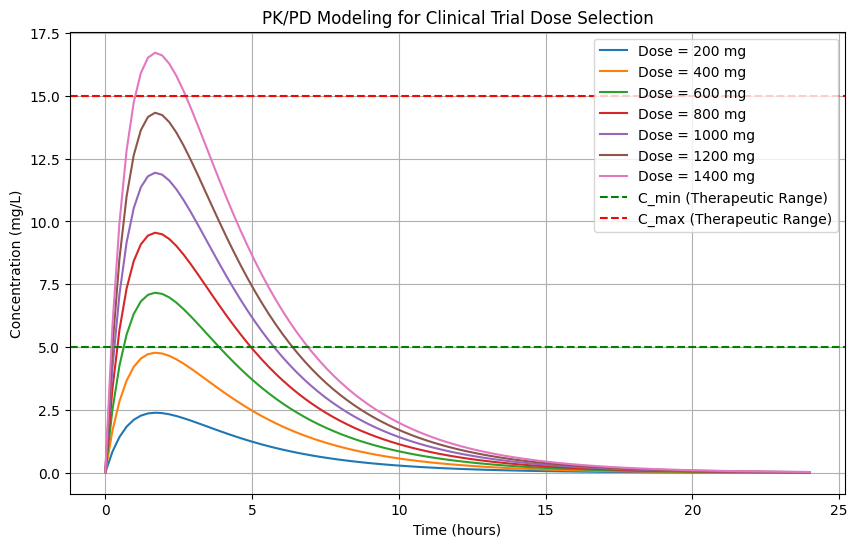

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PK model (including volume of distribution)
def pk_model(t, ka, ke, dose, Vd):
    if ka == ke:
        return np.zeros_like(t)
    concentration = (dose * ka) / (Vd * (ka - ke)) * (np.exp(-ke * t) - np.exp(-ka * t))
    return concentration

# Dosing regimens for the clinical trial (mg)
dose_values = [200, 400, 600, 800, 1000, 1200, 1400]

# Parameters
ka = 1.0          # Absorption rate constant (1/hour)
ke_patient1 = 0.3 # Elimination rate constant for target patient group
Vd = 50           # Volume of distribution (L)

# Therapeutic range (mg/L)
C_min = 5.0   # Minimum therapeutic concentration
C_max = 15.0  # Maximum therapeutic concentration

# Time points (hours)
time = np.linspace(0, 24, 100)

# Plot concentration-time profiles for the different doses
plt.figure(figsize=(10, 6))
for dose in dose_values:
    concentration = pk_model(time, ka, ke_patient1, dose, Vd)
    plt.plot(time, concentration, label=f'Dose = {dose} mg')

# Plot therapeutic range
plt.axhline(C_min, color='green', linestyle='--', label='C_min (Therapeutic Range)')
plt.axhline(C_max, color='red', linestyle='--', label='C_max (Therapeutic Range)')

plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('PK/PD Modeling for Clinical Trial Dose Selection')
plt.legend()
plt.grid(True)
plt.show()